In [1]:
import time, os, math, numpy as np, pandas as pd, sklearn as sk, matplotlib as plt
# import sqlite3
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
# Load dataset for all Primary Care HPSA destinations with one record per facility
df_hpsa_pc = pd.read_csv("data/hpsa/BCD_HPSA_FCT_DET_PC.csv")

# Load dataset for all Mental Health HPSA destinations with one record per facility
# df_hpsa_mh = pd.read_csv('data/hpsa/BCD_HPSA_FCT_DET_MH.csv')

# df_hpsa_auto = pd.read_csv('data/hpsa/SDMS_AUTO_HPSA_SITE_PC.csv')

In [3]:
q = """SELECT * 
       FROM df_hpsa_pc
       LIMIT 10;"""

pysqldf(q)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,PC MCTA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,...,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
0,East Toledo,1396315268,High Needs Geographic HPSA,Primary Care,15,18.0,OH,Designated,01/31/1992,09/09/2021,...,N,OH,39095,39,Ohio,N,N,04/09/2024,2024/04/09,None
1,East Toledo,1396315268,High Needs Geographic HPSA,Primary Care,15,18.0,OH,Designated,01/31/1992,09/09/2021,...,N,OH,39095,39,Ohio,N,N,04/09/2024,2024/04/09,None
2,East Toledo,1396315268,High Needs Geographic HPSA,Primary Care,15,18.0,OH,Designated,01/31/1992,09/09/2021,...,N,OH,39095,39,Ohio,N,N,04/09/2024,2024/04/09,None
3,Noble Correctional Institution,1396293612,Correctional Facility,Primary Care,6,0.0,OH,Designated,08/25/1999,03/15/2022,...,R,OH,39121,39,Ohio,N,N,04/09/2024,2024/04/09,None
4,EDGERTON FAMILY HEALTH CENTER,1396199989,Rural Health Clinic,Primary Care,14,15.0,OH,Designated,12/16/2022,12/16/2022,...,R,OH,39171,39,Ohio,N,N,04/09/2024,2024/04/09,None
5,East Cleveland,1396122517,High Needs Geographic HPSA,Primary Care,17,13.0,OH,Designated,08/05/1994,09/09/2021,...,N,OH,39035,39,Ohio,N,N,04/09/2024,2024/04/09,None
6,East Cleveland,1396122517,High Needs Geographic HPSA,Primary Care,17,13.0,OH,Designated,08/05/1994,09/09/2021,...,N,OH,39035,39,Ohio,N,N,04/09/2024,2024/04/09,None
7,East Cleveland,1396122517,High Needs Geographic HPSA,Primary Care,17,13.0,OH,Designated,08/05/1994,09/09/2021,...,N,OH,39035,39,Ohio,N,N,04/09/2024,2024/04/09,None
8,East Cleveland,1396122517,High Needs Geographic HPSA,Primary Care,17,13.0,OH,Designated,08/05/1994,09/09/2021,...,N,OH,39035,39,Ohio,N,N,04/09/2024,2024/04/09,None
9,East Cleveland,1396122517,High Needs Geographic HPSA,Primary Care,17,13.0,OH,Designated,08/05/1994,09/09/2021,...,N,OH,39035,39,Ohio,N,N,04/09/2024,2024/04/09,None


In [5]:
df_hpsa_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66858 entries, 0 to 66857
Data columns (total 66 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   HPSA Name                                                                 66858 non-null  object 
 1   HPSA ID                                                                   66858 non-null  object 
 2   Designation Type                                                          66858 non-null  object 
 3   HPSA Discipline Class                                                     66858 non-null  object 
 4   HPSA Score                                                                66858 non-null  int64  
 5   PC MCTA Score                                                             21358 non-null  float64
 6   Primary State Abbreviation                                    

In [7]:
print("Unique Cities: " + str(df_hpsa_pc["HPSA City"].nunique()))
print("Unique Counties " + str(df_hpsa_pc["Common County Name"].nunique()))

Unique Cities: 3319
Unique Counties 3210


In [8]:
# df_hpsa_pc geographoc columns
df_hpsa_pc[['Common County Name', 'Common Postal Code', 'HPSA City', 'Common Region Name',
       'Common State Abbreviation', 'Common State County FIPS Code',
       'Common State FIPS Code', 'Common State Name', 'County Equivalent Name',
       'County or County Equivalent Federal Information Processing Standard Code']]

,Common County Name,Common Postal Code,HPSA City,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code
0,"Lucas County, OH",NaN,NaN,Region 5,OH,39095,39,Ohio,Lucas,095
1,"Lucas County, OH",NaN,NaN,Region 5,OH,39095,39,Ohio,Lucas,095
2,"Lucas County, OH",NaN,NaN,Region 5,OH,39095,39,Ohio,Lucas,095
3,"Noble County, OH",43724.0,Caldwell,Region 5,OH,39121,39,Ohio,Noble,121
4,"Williams County, OH",43517.0,Edgerton,Region 5,OH,39171,39,Ohio,Williams,171
...,...,...,...,...,...,...,...,...,...,...
66853,"Lipscomb County, TX",NaN,NaN,Region 6,TX,48295,48,Texas,Lipscomb,295
66854,"Gaines County, TX",79360.0,Seminole,Region 6,TX,48165,48,Texas,Gaines,165
66855,"Schleicher County, TX",NaN,NaN,Region 6,TX,48413,48,Texas,Schleicher,413
66856,"Baylor County, TX",NaN,NaN,Region 6,TX,48023,48,Texas,Baylor,023


In [23]:
df_hpsa_pc["HPSA Population Type"]

0             Geographic Population
1             Geographic Population
2             Geographic Population
3                               NaN
4                               NaN
                    ...            
66853         Geographic Population
66854                           NaN
66855         Geographic Population
66856    Low Income Population HPSA
66857    Low Income Population HPSA
Name: HPSA Population Type, Length: 66858, dtype: object

In [9]:
df_hpsa_pc = df_hpsa_pc.rename(columns={'HPSA Score': 'PC_HPSA_Score'})
# df_hpsa_pc.drop(["HPSA Discipline Class", "Primary State Abbreviation", 
#                  "HPSA Geography Identification Number","State Abbreviation",
#                  "State and County Federal Information Processing Standard Code","State FIPS Code",
#                  "Unnamed: 65", "Primary State FIPS Code", "Primary State Name", "Data Warehouse Record Create Date",
#                  "Data Warehouse Record Create Date Text", "HPSA Withdrawn Date String", 'Common Postal Code',
#                  'Common Region Name', 'Common State Abbreviation','Common State County FIPS Code', 
#                  'Common State FIPS Code','Common State Name','HPSA Postal Code'
#                 ], axis=1, inplace=True)
# df_hpsa_pc

<AxesSubplot:>

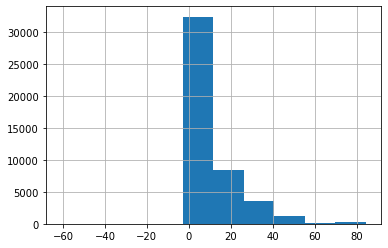

In [10]:
df_hpsa_pc["HPSA Shortage"].hist()

In [11]:
df_select_pc = df_hpsa_pc[["State Name",'HPSA City','Common County Name', 'County Equivalent Name',
                           'Designation Type', 'PC_HPSA_Score', 'PC MCTA Score', 'HPSA Status', 'HPSA Designation Date',
                          'HPSA Designation Last Update Date']]
df_select_pc

,State Name,HPSA City,Common County Name,County Equivalent Name,Designation Type,PC_HPSA_Score,PC MCTA Score,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date
0,Ohio,NaN,"Lucas County, OH",Lucas,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021
1,Ohio,NaN,"Lucas County, OH",Lucas,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021
2,Ohio,NaN,"Lucas County, OH",Lucas,High Needs Geographic HPSA,15,18.0,Designated,01/31/1992,09/09/2021
3,Ohio,Caldwell,"Noble County, OH",Noble,Correctional Facility,6,0.0,Designated,08/25/1999,03/15/2022
4,Ohio,Edgerton,"Williams County, OH",Williams,Rural Health Clinic,14,15.0,Designated,12/16/2022,12/16/2022
...,...,...,...,...,...,...,...,...,...,...
66853,Texas,NaN,"Lipscomb County, TX",Lipscomb,Geographic HPSA,14,14.0,Designated,08/31/1988,09/10/2021
66854,Texas,Seminole,"Gaines County, TX",Gaines,Rural Health Clinic,16,16.0,Withdrawn,09/18/2020,02/05/2024
66855,Texas,NaN,"Schleicher County, TX",Schleicher,Geographic HPSA,15,13.0,Designated,02/27/2009,07/28/2021
66856,Texas,NaN,"Baylor County, TX",Baylor,HPSA Population,10,12.0,Designated,09/20/2017,09/08/2021


In [12]:
df_select_pc['PC_HPSA_Score'].value_counts()

PC_HPSA_Score
0     24214
16     4559
15     4397
14     3883
13     3410
17     3376
12     3343
18     3084
11     3016
19     2490
9      2290
10     2288
8      1492
6      1061
20      929
7       827
21      683
3       374
5       372
4       317
22      205
2        72
23       68
24       41
25       39
1        28
Name: count, dtype: int64

In [18]:
df_select_counties = df_select_pc.groupby(["Common County Name"])["PC_HPSA_Score"].mean().reset_index()
df_select_cities = df_select_pc.groupby(["State Name", "HPSA City"])["PC_HPSA_Score"].mean().reset_index()

In [19]:
df_select_counties

,Common County Name,PC_HPSA_Score
0,"Abbeville County, SC",5.000000
1,"Acadia Parish, LA",12.500000
2,"Accomack County, VA",14.333333
3,"Ada County, ID",8.400000
4,"Adair County, IA",1.000000
...,...,...
3205,"Yuma County, CO",8.666667
3206,"Zapata County, TX",19.500000
3207,"Zavala County, TX",17.000000
3208,"Ziebach County, SD",6.923077


In [20]:
df_select_cities

,State Name,HPSA City,PC_HPSA_Score
0,Alabama,Albertville,8.500000
1,Alabama,Aliceville,21.000000
2,Alabama,Athens,0.000000
3,Alabama,Atmore,13.333333
4,Alabama,Bayou La Batre,18.000000
...,...,...,...
4009,Wyoming,Riverton,16.666667
4010,Wyoming,Rock Springs,11.000000
4011,Wyoming,Sundance,16.000000
4012,Wyoming,Thermopolis,8.000000
